# Guppy Tutorial


## Bell and GHZ states

Let's start by defining a simple quantum function to prepare the Bell state.

$$
| \Phi^+\rangle = \frac{1}{\sqrt{2}}\Big(|00\rangle + |11\rangle\Big)
$$


Reminder... We can think of the $|0\rangle$ state as a column vector $\begin{pmatrix} 1 \\ 0\end{pmatrix}$ and $|1\rangle$ as $\begin{pmatrix} 0 \\ 1\end{pmatrix}$

The multi qubit states $|00\rangle$ and $|11\rangle$ are 

$$
|00\rangle = \begin{pmatrix} 1 \\ 0\end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0\end{pmatrix} = \begin{pmatrix} 1 *\begin{pmatrix} 1 \\ 0\end{pmatrix}\\ 0 * \begin{pmatrix} 1 \\ 0\end{pmatrix}\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}
$$

$$
|11\rangle = \begin{pmatrix} 0 \\ 1\end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1\end{pmatrix} = \begin{pmatrix} 0 *\begin{pmatrix} 0 \\ 1\end{pmatrix}\\ 1 * \begin{pmatrix} 0 \\ 1\end{pmatrix}\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}
$$



We don't need any advanced Guppy features for this. In fact a Bell state can be prepared with a simple quantum circuit.


<p align="center">
  <img src="images/bell_circuit.png" width="400">
</p>



The $H$ and CX gate are defined as follows...






$$
\begin{equation}
\text{H} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}\,, 
\quad
\text{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\end{equation}
$$

These gates have the following action

$$
\begin{equation}
H|0\rangle = \frac{1}{\sqrt{2}} \Big( |0\rangle + |1\rangle\Big)\,,\quad H|1\rangle =  \frac{1}{\sqrt{2}}\Big(|0\rangle - |1\rangle\Big) 
\end{equation}
$$

The CX gate acts on two qubits at once. It flips the target qubit if and only if the first qubit is in the $|1\rangle$ state and otherwise acts as the identity.

$$
\begin{align}
CX|00\rangle &= |00\rangle \\
CX|01\rangle &= |01\rangle \\
CX|10\rangle &= |11\rangle \\
CX|11\rangle &= |10\rangle 
\end{align}
$$




In [1]:
from guppylang import guppy
from guppylang.std.quantum import cx, h, qubit, measure_array
from guppylang.std.builtins import result, array


@guppy
def prepare_bell() -> array[qubit, 2]:
    q0, q1 = qubit(), qubit()  # allocate qubits
    h(q0)  # apply Hadamard gate
    cx(q0, q1)  # Apply CX gate
    return array(q0, q1)  # return qubits to outer scope


prepare_bell.check()  # Type check our Guppy function

In [2]:
@guppy
def main() -> None:
    qs = prepare_bell()
    result("c", measure_array(qs))

Remember in quantum mechanics, measurement is probabilistic. The probability of measuring the Bell state in $|00\rangle$ is given by

$$
P_{00} = \Big|\langle 00 \Big| \frac{1}{\sqrt{2}} \Big( |00\rangle + |11\rangle \Big)\Big|^2 = \Big|\frac{1}{\sqrt{2}}\Big|^2 = \frac{1}{2}
$$

Likewise

$$
P_{11} = \frac{1}{2} 
$$


In [3]:
n_shots = 1000
sim_result = main.emulator(n_qubits=2).with_seed(1).with_shots(n_shots).run()



We therefore obtain measurement results in the $|00\rangle$ and $|11\rangle$ states with equal probability. What do we get if we execute our program for 1000 shots?

In [4]:
print(sim_result.register_counts())

{'c': Counter({'00': 515, '11': 485})}


Let's plot the results of these 1000 shots using matplotlib

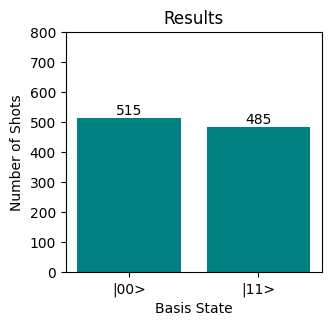

In [5]:
from plotting import plot_results

plot_results(sim_result)

What about a generalised Bell state? 

$$
|\text{GHZ}\rangle^{(n)} = \frac{1}{\sqrt{2}}\Big(|0\rangle^{\otimes n} + |1\rangle^{\otimes n} \Big)
$$

for four qubits

$$
|\text{GHZ}\rangle^{(4)} = \frac{1}{\sqrt{2}}\Big(|0000\rangle + |1111\rangle \Big)
$$

<p align="center">
  <img src="images/GHZ4.png" width="700">
</p>

In [6]:
N = guppy.nat_var("N")


@guppy
def prepare_ghz_state(qubits: array[qubit, N]) -> None:
    h(qubits[0])
    for i in range(len(qubits) - 1):
        cx(qubits[i], qubits[i + 1])

In [7]:
prepare_ghz_state.check()

In [8]:
@guppy
def main() -> None:
    qubits = array(qubit() for _ in range(4))
    prepare_ghz_state(qubits)
    result("c", measure_array(qubits))


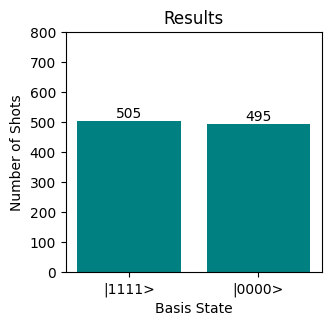

In [9]:
n_shots = 1000
sim_result_ghz = main.emulator(n_qubits=4).with_seed(4242).with_shots(n_shots).run()

plot_results(sim_result_ghz)

## T state injection


<p align="center">
  <img src="images/t_state_injection.png" width="500">
</p>

$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \,, \quad
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$


$$
S = \sqrt{Z} =
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}\,, \quad
T = \sqrt{S} =
\begin{pmatrix}
1 & 0 \\
0 & e^{i \pi/4}
\end{pmatrix}
$$

$$
|T\rangle = T \, H|0\rangle = \frac{1}{\sqrt{2}} \Big( |0\rangle + e^{i \pi/4}|1\rangle \Big)
$$

In [10]:
from guppylang.std.quantum import t, s, x, measure


@guppy
def inject_t(q: qubit) -> None:
    a = qubit()
    h(a)
    t(a)
    cx(a, q)

    if measure(a):
        s(q)
        x(q)


inject_t.check()

## Exercise 1: Prepare the GHZ in constant depth with measurements

Can you use what you've learned about GHZ states and mid-circuit measurements to prepare the GHZ state in constant depth using the construction below? Can you verify the construction by executing the program and looking at the shots as above?

Note: we need $(n-1)$ extra qubits for an $n$ qubit GHZ state (See blog post below). We are trading off the number of qubits for the depth.

<p align="center">
  <img src="images/GHZ_constant.png" width="700">
</p>

Quantum programs with low depth are desirable as each quantum gate is a source of noise. Having a low depth therefore makes the computation more reliable.

Image taken from: https://egrettathula.wordpress.com/2024/03/24/efficient-circuit-for-ghz-state-preparation/ 

You can use this linked blog post as a reference.

## Ownership rules


Operations which borrow qubits -> unitary quantum gates (Hadamard, CX)

Operations which consume qubits -> `measure`, `discard` etc.

As mentioned, Guppy is a compiled language and enforces "ownership rules" at compile time. These ownership rules are inspired by Rust, a modern programming language which emphasizes type safety.

Guppy ownership rules give the following safety guarantees.


1. Qubits cannot be used after they are destructively measured or discarded.
2. A multi-qubit gate cannot use the same qubit more than once no (`cx(q0, q0)`).
3. It is impossible to implicitly discard or leak qubits (no idling qubits).

In [11]:
@guppy
def implicit_discard() -> None:
    q = qubit()  # Allocated qubit is not consumed
    h(q)


implicit_discard.check()  # Check fails :(

Error: Drop violation (at <In[11]>:3:4)
  | 
1 | @guppy
2 | def implicit_discard() -> None:
3 |     q = qubit()  # Allocated qubit is not consumed
  |     ^ Variable `q` with non-droppable type `qubit` is leaked

Help: Make sure that `q` is consumed or returned to avoid the leak

Guppy compilation failed due to 1 previous error


In [12]:
@guppy
def prepare_plus() -> qubit:
    q1 = qubit()
    h(q1)
    return q1  # return ownership of q to the caller


prepare_plus.check()  # Check succeeds :)

In [13]:
@guppy
def prepare_and_measure() -> None:
    q = qubit()
    h(q)
    measure(q)  # consume the qubit q


prepare_and_measure.check()  # Check succeeds :)

## Hadamard test example

Consider the following implementation of the Hadamard test where we want to compute the expectation value of $Y$.

![alt text](./images/CY_circ.png "Title")

In this simple program the expectation value of $Y$ can be related to the probability of measuring the first qubit in the $|0\rangle$ or $|1\rangle$ state.

$$
P_{|0\rangle} = \frac{1 + \langle Y \rangle}{2} \, \quad P_{|1\rangle} = \frac{1 - \langle Y \rangle}{2}
$$

*Exercise:* Can you derive this formula relating the probability of measuring 0 or 1 to the expectation value of $Y$?

We can write a simple Guppy program to implement this test estimating $\langle Y \rangle$

In [17]:
from guppylang.std.quantum import cy, discard


@guppy
def main() -> None:
    a, q = qubit(), qubit()  # Allocate two qubits
    h(a)
    cy(a, q)

    # Measure ancilla in X-basis
    h(a)
    c0 = measure(a)
    discard(q)
    result("c[0]", c0)  # Get the result of measuring the ancilla


main.check()  # Check fails :(

In [22]:
@guppy
def borrow_consumed() -> None:
    q = qubit()
    h(q)
    measure(q)
    h(q)  # Applying a gate to a consumed qubit doesn't work


borrow_consumed.check()  # Check fails :(

Error: Copy violation (at <In[22]>:6:6)
  | 
4 |     h(q)
5 |     measure(q)
6 |     h(q)  # Applying a gate to a consumed qubit doesn't work
  |       ^ Variable `q` with non-copyable type `qubit` cannot be
  |         borrowed ...

Note:
  | 
4 |     h(q)
5 |     measure(q)
  |             - Variable `q` already consumed here

Guppy compilation failed due to 1 previous error


In [30]:
@guppy
def borrow_consumed() -> None:
    q = qubit()
    h(q)
    measure(q)
    h(q)  # Applying a gate to a consumed qubit doesn't work

In [31]:
borrow_consumed.check()

Error: Copy violation (at <In[30]>:6:6)
  | 
4 |     h(q)
5 |     measure(q)
6 |     h(q)  # Applying a gate to a consumed qubit doesn't work
  |       ^ Variable `q` with non-copyable type `qubit` cannot be
  |         borrowed ...

Note:
  | 
4 |     h(q)
5 |     measure(q)
  |             - Variable `q` already consumed here

Guppy compilation failed due to 1 previous error


## Postselection

In this example we will demonstrate the early-exit capabilities of Guppy. 

Adapted from the docs -> https://docs.quantinuum.com/guppy/guppylang/examples/postselect.html


To do this we will have a program which prepares the $|0_L\rangle$ state for the $[[7, 1, 3]]$ Steane code. This program will be subject to some quantum noise. We can ensure that the preparation of the $|0_L\rangle$ state is fault-tolerant by measuring some ancilla qubits and exiting the program if an error is detected.


$$
\begin{equation}
|0_L\rangle = \frac{1}{\sqrt{8}}\big(
|0000000\rangle + 
|1010101\rangle + 
|0110011\rangle + 
|1100110\rangle + 
|0001111\rangle + 
|1011010\rangle + 
|0111100\rangle + 
|1101001\rangle
\big)
\end{equation}
$$

Basic experiment

1. Attempt to prepare the logical $|0\rangle$ state ($|0_L\rangle$)
2. Check for errors with ancilla measurements
3. If an error is detected, exit and try again.

Let's define a `SteaneQubit` struct which encapsulates a single logical qubit in the Steane code. This logical qubit is encoded in seven physical qubits.

In [32]:
@guppy.struct
class SteaneQubit:
    data_qs: array[qubit, 7]

Now we can build a simple quantum program to prepare the $|0_L\rangle$ state. 

<p align="center">
  <img src="images/zero_prep_steane.png" width="400">
</p>


In [33]:
@guppy
def non_ft_zero() -> SteaneQubit:
    data_qubits = array(qubit() for _ in range(7))
    plus_ids = array(0, 4, 6)
    for i in plus_ids:
        h(data_qubits[i])

    cx_pairs = array((0, 1), (4, 5), (6, 3), (6, 5), (4, 2), (0, 3), (4, 1), (3, 2))
    for c, t in cx_pairs:
        cx(data_qubits[c], data_qubits[t])
    return SteaneQubit(data_qubits)

Now we can make our state preparation fault-tolerant by adding some ancilla qubits which interact with our seven encoding qubits. If we measure these ancillas and detect an error, we can exit the program.

In [34]:
from guppylang.std.builtins import exit


@guppy
def ft_zero() -> SteaneQubit:
    q = non_ft_zero()
    ancilla = qubit()
    flags = array(1, 3, 5)
    for f in flags:
        cx(q.data_qs[f], ancilla)
    if measure(ancilla):
        exit("Postselected: FT prep failed", 1)
    return q

Next we need a noise model. Here we will construct an artifical depolarizing channel for execution on Selene.

In [35]:
from selene_sim import DepolarizingErrorModel

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

Finally we can run our program on Selene with our error model and analyse the results.

In [36]:
from guppylang.defs import GuppyFunctionDefinition
from typing import Counter


def run(main_def: GuppyFunctionDefinition) -> Counter:
    res = (
        main_def.emulator(n_qubits=8)
        .stabilizer_sim()
        .with_seed(42)
        .with_shots(1000)
        .with_error_model(error_model)
        .with_progress_bar()
        .run()
    )

    return res.collated_counts()

In [37]:
n = guppy.nat_var("n")


@guppy
def parity_check(data_bits: array[bool, n]) -> bool:
    out = False
    for i in range(n):
        out ^= data_bits[i]
    return out

In [38]:
@guppy
def main() -> None:
    steane_q = ft_zero()

    # Measure the data qubits
    data = measure_array(steane_q.data_qs)
    result("parity", parity_check(data))


run(main)

Emulating shots: 100%|██████████| 1000/1000 [00:00<00:00, 2119.53it/s]


Counter({(('parity', '0'),): 968,
         (('exit: Postselected: FT prep failed', '1'),): 23,
         (('parity', '1'),): 9})

## Exercise 2: Fault-tolerant GHZ state preparation with post selection

Here is a circuit for preparing the 7 qubit GHZ state fault tolerantly for the $[[7, 1, 3]]$ Steane code. A measurement is performed on the `a` qubit to detect errors. Can you implement the post-selection scheme for this circuit along the same lines as the above? You could even explore lower depth GHZ state preparation techniques as mentioned in the blog post in exercise 1.



<p align="center">
  <img src="images/FTGHZ.png" width="700">
</p>


## Thanks for listening!

Check out the docs and tutorials on the Guppy website! https://guppylang.org


<p align="center">
  <img src="images/guppy_site_qr.png" width="200">
</p>

Check out the source code on Github! https://github.com/CQCL/guppylang

Contributions welcome :) look for "good first issue" labels


<p align="center">
  <img src="images/github_site_qr.png" width="200" style="margin-right: 20px;">
  <img src="images/repo_screenshot.png" width="500">
</p>


## References


*[1] -* [Guppy paper 1](https://arxiv.org/pdf/2510.12582) -> Mark Koch, Alan Lawrence, Kartik Singhal, Seyon Sivarajah, & Ross Duncan. (2025). GUPPY: Pythonic Quantum-Classical Programming

*[2] -* [Guppy paper 2](https://arxiv.org/pdf/2510.13082) -> Mark Koch, Agustín Borgna, Craig Roy, Alan Lawrence, Kartik Singhal, Seyon Sivarajah, & Ross Duncan. (2025). Imperative Quantum Programming with Ownership and Borrowing in Guppy. 

*[3] -* GHZ state blog post - "Efficient Circuit for GHZ State Preparation" -> https://egrettathula.wordpress.com/2024/03/24/efficient-circuit-for-ghz-state-preparation/ 

*[4] -* [Reference on zero state encoding in the Steane code](https://www.nature.com/articles/srep19578) - Hayato Goto (2016). Minimizing resource overheads for fault-tolerant preparation of encoded states of the Steane code

*[5] -* [Helios Paper](https://arxiv.org/abs/2511.05465) -> Anthony Ransford, M. S. Allman, Jake Arkinstall, J. P. Campora III, Samuel F. Cooper, Robert D. Delaney, Joan M. Dreiling, Brian Estey, Caroline Figgatt, Alex Hall, Ali A. Husain, Akhil Isanaka, Colin J. Kennedy, Nikhil Kotibhaskar, Ivaylo S. Madjarov, Karl Mayer, Alistair R. Milne, Annie J. Park, Adam P. Reed, Riley Ancona, Molly P. Andersen, Pablo Andres-Martinez, Will Angenent, Liz Argueta, Benjamin Arkin, Leonardo Ascarrunz, William Baker, Corey Barnes, John Bartolotta, Jordan Berg, Ryan Besand, Bryce Bjork, Matt Blain, Paul Blanchard, Robin Blume-Kohout, Matt Bohn, Agustin Borgna, Daniel Y. Botamanenko, Robert Boutelle, Natalie Brown, Grant T. Buckingham, Nathaniel Q. Burdick, William Cody Burton, Varis Carey, Christopher J. Carron, Joe Chambers, John Children, Victor E. Colussi, Steven Crepinsek, Andrew Cureton, Joe Davies, Daniel Davis, Matthew DeCross, David Deen, Conor Delaney, Davide DelVento, B. J. DeSalvo, Jason Dominy, Ross Duncan, Vanya Eccles, Alec Edgington, Neal Erickson, Stephen Erickson, Christopher T. Ertsgaard, Bruce Evans, Tyler Evans, Maya I. Fabrikant, Andrew Fischer, Cameron Foltz, Michael Foss-Feig, David Francois, Brad Freyberg, Charles Gao, Robert Garay, Jane Garvin, David M. Gaudiosi, Christopher N. Gilbreth, Josh Giles, Erin Glynn, Jeff Graves, Azure Hansen, David Hayes, Lukas Heidemann, Bob Higashi, Tyler Hilbun, Jordan Hines, Ariana Hlavaty, Kyle Hoffman, Ian M. Hoffman, Craig Holliman, Isobel Hooper, Bob Horning, James Hostetter, Daniel Hothem, Jack Houlton, Jared Hout, Ross Hutson, Ryan T. Jacobs, Trent Jacobs, Melf Johannsen, Jacob Johansen, Loren Jones, Sydney Julian, Ryan Jung, Aidan Keay, Todd Klein, Mark Koch, Ryo Kondo, Chang Kong, Asa Kosto, Alan Lawrence, David Liefer, Michelle Lollie, Dominic Lucchetti, Nathan K. Lysne, Christian Lytle, Callum MacPherson, Andrew Malm, Spencer Mather, Brian Mathewson, Daniel Maxwell, Lauren McCaffrey, Hannah McDougall, Robin Mendoza, Michael Mills, Richard Morrison, Louis Narmour, Nhung Nguyen, Lora Nugent, Scott Olson, Daniel Ouellette, Jeremy Parks, Zach Peters, Jessie Petricka, Juan M. Pino, Frank Polito, Matthias Preidl, Gabriel Price, Timothy Proctor, McKinley Pugh, Noah Ratcliff, Daisy Raymondson, Peter Rhodes, Conrad Roman, Craig Roy, Ciaran Ryan-Anderson, Fernando Betanzo Sanchez, George Sangiolo, Tatiana Sawadski, Andrew Schaffer, Peter Schow, Jon Sedlacek, Henry Semenenko, Peter Shevchuk, Susan Shore, Peter Siegfried, Kartik Singhal, Seyon Sivarajah, Thomas Skripka, Lucas Sletten, Ben Spaun, R. Tucker Sprenkle, Paul Stoufer, Mariel Tader, Stephen F. Taylor, Travis H. Thompson, Raanan Tobey, Anh Tran, Tam Tran, Grahame Vittorini, Curtis Volin, Jim Walker, Sam White, Douglas Wilson, Quinn Wolf, Chester Wringe, Kevin Young, Jian Zheng, Kristen Zuraski, Charles H. Baldwin, Alex Chernoguzov, John P. Gaebler, Steven J. Sanders, Brian Neyenhuis, Russell Stutz, & Justin G. Bohnet. (2025). Helios: A 98-qubit trapped-ion quantum computer